# Model - Gaussian

This example shows how to use `lmfit_global.LmfitGlobal` class to fit data with simple gaussian. 

This example is similar to `model_gaussian.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import os, sys
    ROOT = os.path.abspath("..") # parent folder of examples
    sys.path.insert(0, ROOT)
    from lmfit_global import LmfitGlobal

import matplotlib.pyplot as plt
# sys.path

# Define `LmfitGlobal` class `items` data

First, load raw data...

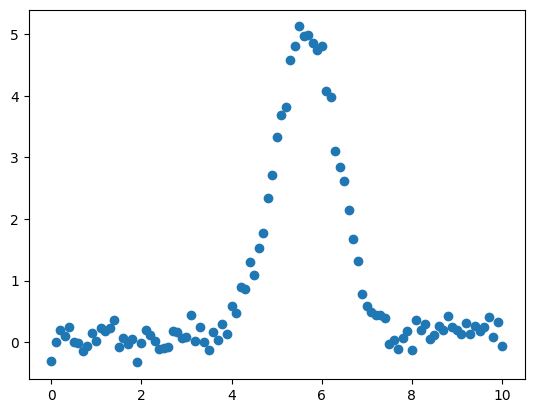

In [2]:
import os
import numpy as np
dpath = './data'  # data path

# --- Load data (skip header) ---
file = 'model1d_gauss.dat' # data
file = os.path.join(
    dpath,
    file
)

data = np.loadtxt(file)
x = data[:, 0]  # first  columm as x
y = data[:, 1]  # second column as y

#  --- make column data as [x, y]  ---
#  --- lets use numpy.column_stack ---
xy = np.column_stack([x, y])

# plot raw data
plt.figure()
plt.plot(x, y, 'o')
plt.show()

second, model function to fit data...

In [3]:
# import numpy as np

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

finally, built `data` and `function` **`items`** `dict` for `LmfitGlobal` ...

In [4]:
# data dict
data_dict = {
    'xy': xy,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }

# --- NOTE ---
# (1) init_params items must match "gaussian" function arguments defined above
# (2) init_params argument you can set, 'value', 'vary':True/False, bounds, 'min'/'max' below
# (3) you can set mimimal either, 'value', or 'vary' or 'min'/'max', else defualt parameters will be used
# (4) defualt parameters are: 'value':-inf, 'vary':True, 'min':-inf & 'max':+inf
func_lst = [
    {
        'func_name': gaussian,
        'init_params' : {
            'amp': {'value':5, },
            'cen': {'value':5, },
            'wid': {'value':1, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': None,
}


# """
# # --- The `theory_connectors` (list of str): 
#     A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
#     the theory functions listed in 'theory'. Each operator connects one function to the next 
#     in left-to-right order. 
    
#     For example: 
#     - ['+', '+'] means: theory[0] + theory[1] + theory[2].

#     - ['+', '*'] means: theory[0] + theory[1] * theory[2].

#     The number of connectors must be exactly one less than the number of theory functions.
#     The ONLY (so-far) supported operators are: '+', '-', '*', '/'.

# NOTE: Here in this  case is None or []
# """


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. theory (see above)
}

call `LmfitGlobal` class ...

In [5]:
lg = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Parsing inputs...
INFO: Parsing input data...
INFO: Detected 1 dataset(s) with N=101 points each...
INFO: XRANGE: N=101 points each for user supplied xrange [0.0, 10.0] ...
INFO: Parsing input data COMPLETED...
INFO: Parsing function models...
INFO: 1 model component(s) detected — single-component fit...
INFO: Parsing function models COMPLETED...
INFO: The model is to be constructed as...
INFO: ######################################
INFO: # y(x;) = gaussian(x, amp, cen, wid) #
INFO: ######################################
INFO: Building lmfit backend...
INFO: Creating lmfit.Models for the models(s) function(s)...
INFO: Building lmfit CompositeModel...
INFO: CompositeModel built successfully...
INFO: Initialized parameters...


(Optional) print & plot initial parameter definitions...

In [6]:
lg.init_params.pretty_print()  # pretty print initial parameters 
# The parameternames_{index} is generic how the cord works to indicate data index
# for multidatasets parameternames_0, parametername_1, ..., will be displayed

# # --- fancy plots --- (USE IN NEXT EXAMPLES)
# pretty_kw={'width': 6, 'height':6, 'dpi':100} # width and height and dpi of figure, or None to use default settings
# ax0 = lg.plot_init(numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)  # plot init parameters

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp_0         5     -inf      inf     None     True     None     None
cen_0         5     -inf      inf     None     True     None     None
wid_0         1     -inf      inf     None     True     None     None


Now, do fit...

In [7]:
lg.fit(verbose=True)  # verbose, if True will show fit parameters

INFO: Fitting started (fit_method='leastsq') ...
INFO: Parameters fit values:
INFO: Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: amp_0      8.88     -inf      inf   0.1136     True     None     None
INFO: cen_0     5.659     -inf      inf   0.0103     True     None     None
INFO: wid_0    0.6977     -inf      inf  0.01031     True     None     None
INFO: Coefficient of determination (R^2) statistics:
INFO:   R-squared = 0.98533348
INFO: Fitting finished: SUCCESS
INFO: nfev=33 | rsquared=0.98533348 | redchi=0.034784041 | aic=-336.26371 | bic=-328.41835 | time=0.01s ...


or better use: `.report()` ...

In [8]:
lg.report()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 101
    # variables        = 3
    chi-square         = 3.40883599
    reduced chi-square = 0.03478404
    Akaike info crit   = -336.263713
    Bayesian info crit = -328.418352
    R-squared          = 0.98533348
[[Variables]]
    amp_0:  8.88021893 +/- 0.11359522 (1.28%) (init = 5)
    cen_0:  5.65866102 +/- 0.01030495 (0.18%) (init = 5)
    wid_0:  0.69765478 +/- 0.01030505 (1.48%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp_0, wid_0) = +0.5774


plot fit...(matplotlib)

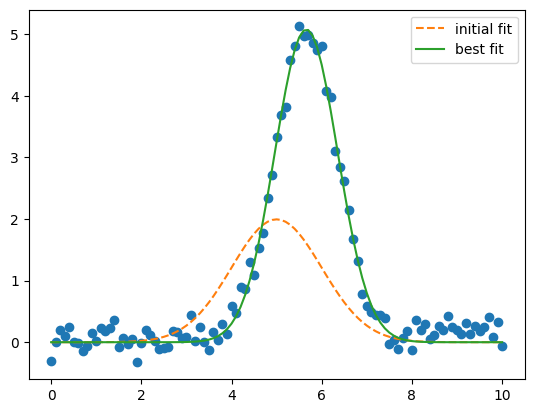

In [9]:
plt.plot(xy[:, 0], xy[:, 1], 'o')
plt.plot(xy[:, 0], lg.init_fit, '--', label='initial fit')
plt.plot(xy[:, 0], lg.best_fit, '-', label='best fit')
plt.legend()
plt.show()

plot fit...(Fancy LmfitGlobal matplotlib)

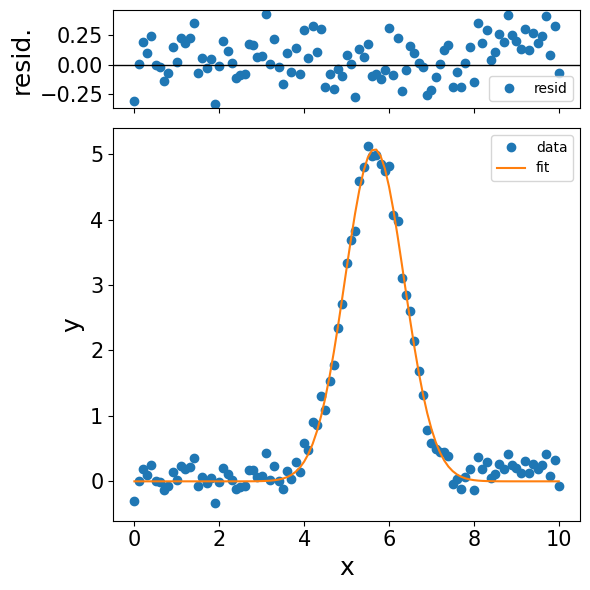

In [10]:
# --- fancy plots ---
pretty_kw={'width': 6, 'height':6, 'dpi':100} # width and height and dpi of figure, or None to use default settings
ax1 = lg.plot_fit(plot_residual=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)  # plot fit parameters
# --- OR ---
# ax1 = lg.plot(plot_residual=True, show=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)


plot fit...(User plotting choice)

first, extract the fit data using:  `.get_fitdata(numpoints=None)`

where numpoints (integer), to get more dense point

```python
fd = lg.get_fitdata(numpoints=None) # int or None
```

returns a FitData object that provides structured access to the results.

The returned FitData object contains:

Raw data:
```python
fd.x_data    # ndarray (N,)
fd.y_data    # ndarray (N, ny)
```

Initial model (before fitting):
```python
fd.x_model   # ndarray (N or numpoints)
fd.y_init    # ndarray (N or numpoints, ny)
fd.resid_init  # y_data - initial_model (on data grid)
```

Best-fit model (after fitting):
```python
fd.y_fit       # ndarray (N or numpoints, ny) or None if not fitted
fd.resid_fit   # ndarray (N, ny) or None if not fitted
```

Multi-component models (if applicable):
```python
fd.components  # dict or None
```

NOW, A USER CAN USE ANY CHOICE OF PLOTTING PROGRAM/CODE

lets do matplotlib again...

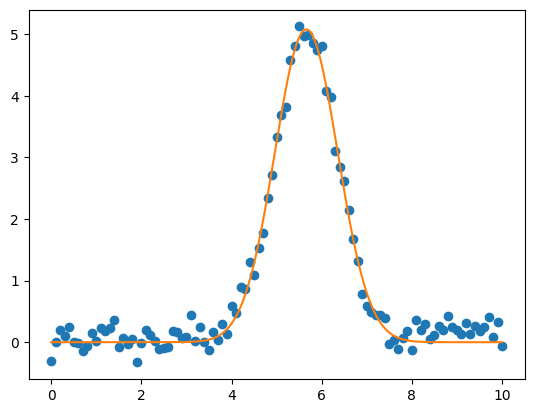

In [11]:
fd = lg.get_fitdata(numpoints=1024) # int or None
fd.x_data


for i in range(lg.ny):
    plt.plot(fd.x_data,  fd.y_data[:, i], 'o', zorder=1)
    plt.plot(fd.x_model, fd.y_fit[:, i],  '-', zorder=2)

plt.show()

# where ny is number of datasets, luckily here we dealing with single-dataset
# see next examples on how we can handle multi-datasets
